### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.01$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) There could be some strong linear relationship between $x$ and $y$.

(c) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.01.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

### A. There should be no strong relation between x and y
### D. Certain relation between x and y could still exist, but it should be non-linear.

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x doubles (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'>2y$ if b is bigger than one.

(b) $y'<2y$ if b is less than one.

(c) $y'=2y$ in any case.

(d) $y'$ increases by $(2^b-1)*100\%$.

### A
### B 
### D

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import math
import matplotlib.pylab as plt
%matplotlib inline

### Question (3): (30 pt)


In [11]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [12]:
y=[28.0, 24.0, 37.0, -7.0, 28.0, 71.0, 89.0, 60.0, 100.0, 108.0, 116.0, 
   110.0, 114.0, 123.0, 124.0, 165.0, 169.0, 211.0, 211.0, 208.0]

### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [16]:
n = len(x)
avg_x = np.mean(x)
avg_y = np.mean(y)
diffprod = 0
xdiff2 = 0
ydiff2 = 0
for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

corr_corf = diffprod / math.sqrt(xdiff2 * ydiff2)
print corr_corf

0.957143492915


Checking the correlation coefficient by built-in function

In [33]:
data=pd.DataFrame([list(x),list(y)]).T
data.columns=["x","y"]
data.head(3)
data.corr()

,x,y
x,1.000000,0.957143
y,0.957143,1.000000


### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [34]:
data.loc[:,"x_sqr"]=data.x*data.x
data.loc[:,"xy"]=data.x*data.y
# calculate w1. 
w1=(data.xy.sum()-data.y.sum()*data.x.sum()/len(data))/(data.x_sqr.sum()-data.x.sum()*data.x.sum()/len(data))
print("w1 is : {}".format(w1))

w1 is : 10.5466165414


In [35]:
#calculate w0
w0=(data.y-data.x*w1).mean()
print("w0 is : {}".format(w0))

w0 is : 4.25714285714


In [36]:
# Predicted values and errors
data.loc[:,"pred"]=w1*data.x+w0
data.loc[:,"err"]=data.y-data.pred
data.head(3)

,x,y,x_sqr,xy,pred,err
0,0.0,28.0,0.0,0.0,4.257143,23.742857
1,1.0,24.0,1.0,24.0,14.803759,9.196241
2,2.0,37.0,4.0,74.0,25.350376,11.649624


In [37]:
#Calculate R-squared.
R_2=1-(data.err**2).sum()/((data.y-data.y.mean())**2).sum()
R_2

0.9161236660304586

### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [38]:
lm = smf.ols(formula='y ~ x', data = data).fit()
print lm.params
print lm.rsquared

Intercept     4.257143
x            10.546617
dtype: float64
0.91612366603


### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [2]:
data_4=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/Session02/Housing_Pluto_Session2.csv")

In [3]:
data_4

,ZipCode,LotArea,AssessTot
0,11201.0,151930,1164645
1,11201.0,9620,5864850
2,11201.0,19682,12019950
3,NaN,0,0
4,11201.0,387060,0
5,11201.0,6384,21150
6,11201.0,0,1800
7,11201.0,0,0
8,11201.0,0,1800
9,11201.0,323307,0


In [4]:
data_4.describe()

/Users/Shalmali/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ZipCode,LotArea,AssessTot
count,276923.000000,2.775720e+05,2.775720e+05
mean,11220.413241,6.029366e+03,1.856336e+05
std,11.217362,4.296634e+05,5.779277e+06
min,11201.000000,0.000000e+00,0.000000e+00
25%,NaN,1.900000e+03,2.239400e+04
50%,NaN,2.138000e+03,3.068800e+04
75%,NaN,2.833000e+03,4.951900e+04
max,11416.000000,2.073912e+08,2.539648e+09


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [7]:
data_4 = data_4.loc[~(data_4==0).any(axis=1)]
data_4

,ZipCode,LotArea,AssessTot
0,11201.0,151930,1164645
1,11201.0,9620,5864850
2,11201.0,19682,12019950
5,11201.0,6384,21150
10,11201.0,66889,11700
12,11201.0,4644,109620
13,11201.0,517,459
14,11201.0,4293,4590
15,11201.0,80873,679140
16,11201.0,29955,265500


In [8]:
data_4.dropna()

,ZipCode,LotArea,AssessTot
0,11201.0,151930,1164645
1,11201.0,9620,5864850
2,11201.0,19682,12019950
5,11201.0,6384,21150
10,11201.0,66889,11700
12,11201.0,4644,109620
13,11201.0,517,459
14,11201.0,4293,4590
15,11201.0,80873,679140
16,11201.0,29955,265500


#### (b). Visualize the data set.

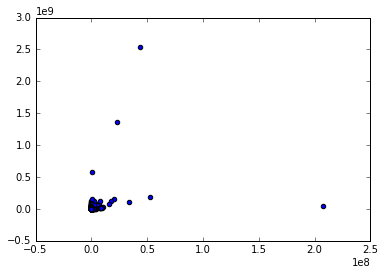

In [11]:
plt.scatter(data_4.LotArea, y=data_4.AssessTot)
plt.show()

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

In [12]:
lm = smf.ols(formula='AssessTot ~ LotArea', data = data_4).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:              AssessTot   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                 1.966e+04
Date:                Fri, 14 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:03:06   Log-Likelihood:            -4.6861e+06
No. Observations:              276362   AIC:                         9.372e+06
Df Residuals:                  276360   BIC:                         9.372e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.657e+05   1.06e+04     15.567      0.0

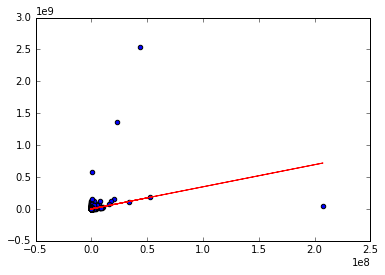

In [13]:
plt.scatter(data_4.LotArea, y=data_4.AssessTot)
plt.plot(data_4.LotArea,((data_4.LotArea*lm.params[1]) + lm.params[0]),c='r')
plt.show()

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

In [37]:
lm.params[0]

165731.67130338849

In [32]:
lm.params[1]

3.4670288647596452

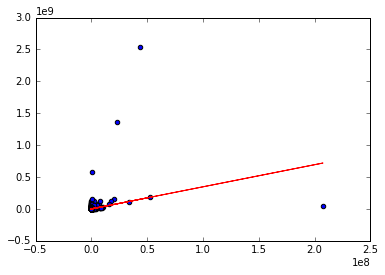

In [35]:
plt.scatter(data_4.LotArea, y=data_4.AssessTot)
plt.plot(data_4.LotArea,(data_4.LotArea * lm.params[1]),c='r')
plt.show()

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

In [15]:
#q7. generate two new columns: log_Population and log_Total_earning in data_5 using np.log() function.
data_4.loc[:,"log_LotArea"]=np.log(data_4.LotArea)
data_4.loc[:,"log_AssessTot"]=np.log(data_4.AssessTot)
data_4.head()

,ZipCode,LotArea,AssessTot,log_LotArea,log_AssessTot
0,11201.0,151930,1164645,11.931175,13.967927
1,11201.0,9620,5864850,9.171600,15.584487
2,11201.0,19682,12019950,9.887460,16.302078
5,11201.0,6384,21150,8.761550,9.959395
10,11201.0,66889,11700,11.110790,9.367344


In [16]:
lr = smf.ols(formula='log_AssessTot ~ log_LotArea', data = data_4).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:          log_AssessTot   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.673e+05
Date:                Fri, 23 Sep 2016   Prob (F-statistic):               0.00
Time:                        18:42:43   Log-Likelihood:            -3.4615e+05
No. Observations:              276362   AIC:                         6.923e+05
Df Residuals:                  276360   BIC:                         6.923e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.2478      0.020     12.360      

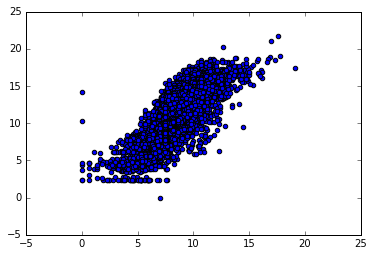

In [17]:
plt.scatter(data_4.log_LotArea,data_4.log_AssessTot)
plt.show()

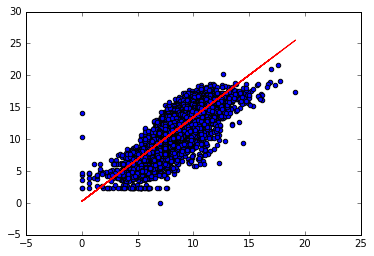

In [19]:
plt.scatter(data_4.log_LotArea,data_4.log_AssessTot)
plt.plot(data_4.log_LotArea,lr.predict(),'r-')
plt.show()

### *Additional extra-credit question (Using the housing price data set from question (4)) (40 pt to be added to the cumulative homework score up to the maximum of 100%(for whole semester))

#### (a) How many different zip codes are in the data? report the number of observations for each zipcode.

#### (b) For each zip code having over 1000 observations, report the average assessed total value of houses.

#### (c) For each zip code estimate the log scale model 'log_AssessTot ~ log_LotArea' and report the slope coefficient (scaling exponent).

#### (d) Visualize the spatial distribution of the values from (b) and (c). Report the top 5 zip code with highest scaling exponents.

In [71]:
data_4.ZipCode.value_counts()  #No. of Observations in each zipcode. 

11234.0    19318
11236.0    14612
11229.0    12063
11207.0    11413
11208.0    11284
11203.0    11011
11223.0    10322
11204.0     9946
11214.0     9513
11221.0     9186
11215.0     9056
11220.0     9015
11219.0     8656
11210.0     8540
11209.0     8451
11233.0     8014
11230.0     7987
11235.0     7941
11228.0     7857
11218.0     6905
11212.0     6578
11216.0     6113
11211.0     5462
11226.0     5336
11222.0     5311
11213.0     5076
11238.0     4876
11231.0     4838
11206.0     4665
11237.0     4390
11217.0     4035
11225.0     3920
11201.0     3361
11205.0     3196
11232.0     2946
11224.0     2798
11249.0     1561
11239.0      424
11416.0        4
11251.0        1
11241.0        1
Name: ZipCode, dtype: int64

In [41]:
data_4.ZipCode.nunique()  #total number of zipcodes

41

In [90]:
data_gr = data_4.groupby('ZipCode').AssessTot.mean()   # Average by zipcode.
data_gr.head(10)

ZipCode
11201.0    1.672253e+06
11203.0    1.210203e+05
11204.0    1.045425e+05
11205.0    3.509409e+05
11206.0    3.115333e+05
11207.0    1.003423e+05
11208.0    8.644045e+04
11209.0    1.731870e+05
11210.0    1.194678e+05
11211.0    2.493017e+05
Name: AssessTot, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117510290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11823f5d0>]], dtype=object)

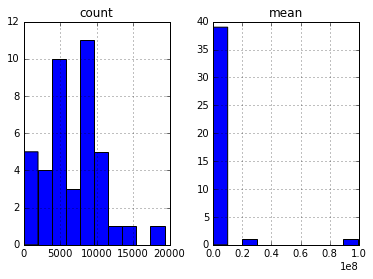

In [72]:
data_gr.hist()

In [88]:
data_zip = data_4.groupby('ZipCode').LotArea.mean()

In [89]:
data_zip.head()

ZipCode
11201.0    7849.991669
11203.0    3588.370993
11204.0    3004.730243
11205.0    5601.588861
11206.0    5822.614791
Name: LotArea, dtype: float64

In [91]:
result = pd.concat([data_gr,data_zip], axis=1)

In [92]:
result.head()

,AssessTot,LotArea
ZipCode,,
11201.0,1.672253e+06,7849.991669
11203.0,1.210203e+05,3588.370993
11204.0,1.045425e+05,3004.730243
11205.0,3.509409e+05,5601.588861
11206.0,3.115333e+05,5822.614791


In [93]:
result.loc[:,"Log_AssessTot"] = np.log(result.AssessTot)
result.loc[:,"Log_LotArea"] = np.log(result.LotArea)
result.head()

,AssessTot,LotArea,Log_AssessTot,Log_LotArea
ZipCode,,,,
11201.0,1.672253e+06,7849.991669,14.329682,8.968268
11203.0,1.210203e+05,3588.370993,11.703713,8.185454
11204.0,1.045425e+05,3004.730243,11.557349,8.007943
11205.0,3.509409e+05,5601.588861,12.768373,8.630806
11206.0,3.115333e+05,5822.614791,12.649261,8.669505


In [95]:
lm = smf.ols(formula='Log_AssessTot ~ Log_LotArea', data = result).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:          Log_AssessTot   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     77.78
Date:                Fri, 23 Sep 2016   Prob (F-statistic):           7.92e-11
Time:                        22:14:22   Log-Likelihood:                -50.511
No. Observations:                  41   AIC:                             105.0
Df Residuals:                      39   BIC:                             108.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       4.0735      0.952      4.277      